In [53]:
from pandas import read_csv
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [54]:
data = read_csv('sunspots.csv', header=0, index_col=0)
data

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8


<AxesSubplot:>

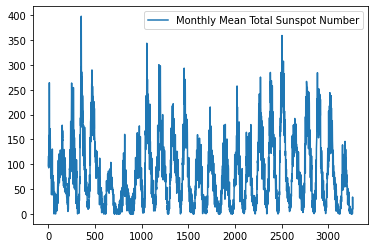

In [55]:
data.plot()

In [56]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [57]:
data['Date'] = pd.to_datetime(data['Date'])

In [58]:
model = SARIMAX(data['Monthly Mean Total Sunspot Number'], order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
results = model.fit()

In [59]:
yhat = results.predict(start=len(data), end=len(data) + len(data[-10:]) - 1)
actual_values = data['Monthly Mean Total Sunspot Number'][-10:]

In [66]:
rmse = mean_squared_error(actual_values, yhat)**0.5
print('RMSE: %.3f' % rmse)

RMSE: 10.618


In [63]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actual_values, yhat)
print('Mean Absolute Error (MAE): %.3f' % mae)


Mean Absolute Error (MAE): 7.952


In [65]:
# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual_values, yhat)
print('Mean Absolute Percentage Error (MAPE): %.3f%%' % mape)


Mean Absolute Percentage Error (MAPE): 650.442%


In [64]:
# Mean Forecast Error (MFE)
def mean_forecast_error(y_true, y_pred):
    return np.mean(y_true - y_pred)

mfe = mean_forecast_error(actual_values, yhat)
print('Mean Forecast Error (MFE): %.3f' % mfe)


Mean Forecast Error (MFE): nan
